# Number & Algebra

## Number Theory

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/numbersys.png" alt="数系统5层" width="350">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/自然数整数有理数实数复数.png" alt="自然数-整数-有理数-实数-复数" width="600">

Sets & Proofs, Venn Diagrams, Number Systems & Calculation, Prime, Congruence, tests for primality, Fundamental Theorem of Arithmetic, Fermat's little theorem, Gauss' lemma, Euler's theorem 

[Pre-calculus by Openstax](https://openstax.org/subjects/math) 

    Sets
    └── Basic Set Concepts, Subsets, Venn Diagrams, Set Operations with Two Sets and Three Sets 
    Logic & Formulas
    ├── Statements and Quantifiers, Compound Statements, Constructing Truth Tables
    ├── Truth Tables for Conditional and Biconditional, Equivalent Statements, De Morgan's Laws, Logical Arguments 
    ├── Propositions from Propositions 命题中的命题, Propositional Logic in Computer Programs 计算机程序中的命题逻辑
    └── Equivalence and Validity 等价性和有效性, The Algebra of Propositions 命题的代数, The Sat Problem, Predicate Formulas谓词公式
    Proofs
    ├── Propositions命题, Predicates谓词, The Axiomatic Method公理化方法, Our Axioms, Proving an Implication证明蕴涵
    └── Proving An “If and Only If” 证明“当且仅当, Proof by Cases案例证明, Proof by Contradiction反证法 
    Induction 归纳法
    └── Ordinary Induction, Strong Induction强归纳法 Vs. Induction Vs. Well Ordering Proofs良序证明, State Machines
    Number Systems
    ├── Prime and Composite Numbers, Integers, Order of Operations, Rational Numbers, Irrational Numbers
    └── Real Numbers, Clock Arithmetic, Exponents, Scientific Notation, Arithmetic Sequences, Geometric Sequences
    Number Theory
    ├── Divisibility可除性, Greatest Common Divisor最大公约数, Prime, The Fundamental Theorem of Arithmetic 算术基本定理
    ├── Alan Turing 阿兰图灵, Modular Arithmetic 模算术, Remainder Arithmetic 余数算术, Turing’S Code (Version 2.0) 图灵密码
    └── Multiplicative Inverses and Cancelling乘法逆和抵消, Euler's Theorem, RSA Public Key Encryption 公钥加密
    Number Representation and Calculation
    ├── Hindu-Arabic Positional System, Early Numeration Systems, Converting with Base Systems
    └── Addition and Subtraction in Base Systems, Multiplication and Division in Base Systems
    Sequences, Probability and Counting Theory （前面就是组合论了）
    ├── Sequences and Their Notations, Arithmetic Sequences, Geometric Sequences, Series and Their Notations
    └── Counting Principles, Binomial Theorem, Probability

In [ ]:
# Investigating Pi and e
from sympy import *
x=symbols('x')
print(limit(sin(x)/x,x,0))
print(limit(pow(1+1/x,x),x,oo)) # natural constant e

# job 1: estimate pi in series
import math
sum = 0  # Initialize the sum to 0
for n in range(10000):  # Iterate over the terms of the series
    term = 4*(-1)**n / (2*n + 1)     # Compute the nth term of the series
    sum += term                        # Add the term to the sum
print("Pi Estimate:", sum)  # Multiply the sum by 4 to get an estimate of pi

# job 1.1: estimate pi using a limit
n = 9   ;      print("pi is", n*math.sin(math.radians(180/n)))
n = 99  ;      print("pi is", n*math.sin(math.radians(180/n)))
n = 999999999; print("pi is", n*math.sin(math.radians(180/n)))

# job 2: estimate e in series
sum1 = 1  # Initialize the sum and factorial to 1
factorial = 1
for n in range(1, 10000):  # Iterate over the terms of the series
    factorial *= n         # Compute the nth term of the series
    term = 1 / factorial
    sum1 += term
print("e Estimate:", sum1)

# job 2.1: estimate e in compound form
n = 100   ; print("Estimated value of e:", (1 + 1/n) ** (n*1))
n = 1000  ; print("Estimated value of e:", (1 + 1/n) ** (n*1))
n = 100000000  ; print("Estimated value of e:", (1 + 1/n) ** (n*1))

Above is stupid Python, now let's use Sage:

In [2]:
var('x,n')
ff = sqrt(sum(6/n^2 ,n,1,oo, hold=True))  # converged limit of pi
s(ff == ff.unhold().n())  

epow = sum(x^n/factorial(n),n,0,oo, hold=True) # 8 Power Series of e
s(epow == epow.unhold())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sage practice

- Ring: e.g. Integer ZZ
- Field: e.g. Rational QQ, Real RR, Complex CC

In [6]:
a=1;       print(type(a));
b=2/3;     print(type(b));
d=CC(1+I); print(type(d))

<class 'sage.rings.integer.Integer'>
<class 'sage.rings.rational.Rational'>
<class 'sage.rings.complex_mpfr.ComplexNumber'>


In [ ]:
# RSA & Number Theory
p=37; q=73; c=5; n=p*q; L=lcm(p-1,q-1); d=inverse_mod(c,L)
print('L: ', L)
print('d: ', d)
x=33
print('Original message: ', x)
r = x^c%n; r
print('Encrypted message: ', r)
dm=r^d%n;
print('Decrypted message: ', dm)

# RSA on a string of characters
symbols=[chr(i) for i in range(ord('A'),ord('Z')+1)]
symbols.append('.'); symbols.append(','); symbols.append('!'); symbols.append(' ');
def encrypt(s):
    ms = [1+symbols.index(s[i]) for i in range(0,len(s))];
    es = map(lambda x: x^c%n,ms)
    return es
def decrypt(x):
    ds = map(lambda x: x^d%n, x)
    return ''.join([symbols[i-1] for i in ds])

message = "THE TIME HAS COME."
emessage = encrypt(message)
print(emessage)
dmessage = decrypt(emessage)
print(dmessage)

L:  72
d:  29
Original message:  33
Encrypted message:  604
Decrypted message:  33
THE TIME HAS COME.


### Continued Fraction (Diophantine Approximation)

Numerators and denominators ${N_i}$ and ${D_i}$ could be any sequences or functions

$$D_0+\cfrac{N_1}{D_1+\cfrac{N_2}{{ D_k+\cfrac{N_k}{\ddots}}}} = D_0 + \mathop{K}\limits_{i=1}^{\infty} \frac{N_i}{D_i} \quad  e.g. \quad
1+\frac{1}{2+\frac{1}{{ 2+\frac{1}{\ddots}}}}$$

In [ ]:
(* 连分数 Continued Fraction for Sqrt[2] *)
ContinuedFraction[Sqrt[2], 10]   (*generate D series*)
Convergents[ContinuedFraction[Sqrt[2], 10]] (*generate each CF*)
  (*now do it manually, 
  Fold[f, x, {a, b, c, d}] == f{f{f{f[x,a],b},c},d}
  #1 is the accumulated result; #2 is the the current element;
  '&' at the end: defining an anonymous function *)
aa[x] := Fold[#2 + 1/#1 &, x, Reverse[x]]; 
aa[ContinuedFraction[Sqrt[2], 2]]

{1, 2, 2, 2, 2, 2, 2, 2, 2, 2}

{1, 3/2, 7/5, 17/12, 41/29, 99/70, 239/169, 577/408, 1393/985, 3363/2378}

aa[{1, 2}]

## Algebra
Inequalities, Polynomial, Curves, Complex Numbers, Factorization, Trigonometry, Functions
- Ending with Euler Formula which unify $sin$, $i$, $e$ and the whole fundamental Algebra

[Pre-calculus by Openstax](https://openstax.org/subjects/math) 

    Algebra
    ├── Algebraic Expressions, Linear Equations in One Variable with Applications
    ├── Linear Inequalities in One Variable with Applications, Ratios and Proportions, Graphing Linear Equations and Inequalities
    ├── Quadratic Equations with Two Variables with Applications, Functions, Graphing Functions
    └── Systems of Linear Equations in Two Variables, Systems of Linear Inequalities in Two Variables, Linear Programming
    1. Functions
    ├── Functions and Function Notation, Domain and Range, Rates of Change and Behavior of Graphs
    └── Composition of Functions, Transformation of Functions, Absolute Value Functions, Inverse Functions
    2. Linear Functions
    └── Linear Functions, Graphs of Linear Functions, Modeling with Linear Functions, Fitting Linear Models to Data
    3. Polynomial and Rational Functions
    ├── Complex Numbers, Quadratic Functions, Power Functions and Polynomial Functions, Graphs, Dividing Polynomials
    └── Zeros of Polynomial Functions, Rational Functions, Inverses and Radical Functions, Modeling Using Variation
    4. Exponential and Logarithmic Functions
    ├── Exponential Functions, Graphs, Logarithmic Functions, Graphs, Logarithmic Properties
    └── Exponential and Logarithmic Equations, Exponential and Logarithmic Models, Fitting Exponential Models to Data 
    5. Trigonometric Functions
    ├── Angles, Unit Circle: Sine and Cosine Functions
    └── The Other Trigonometric Functions, Right Triangle Trigonometry
    6. Periodic Functions
    └── Graphs of the Sine and Cosine Functions, Graphs of the Other Trigonometric Functions, Inverse Trigonometric Functions 
    7. Trigonometric Identities and Equations
    ├── Solving Trigonometric Equations with Identities, Sum and Difference Identities, Double-Angle
    ├── Half-Angle, and Reduction Formulas, Sum-to-Product and Product-to-Sum Formulas
    └── Solving Trigonometric Equations, Modeling with Trigonometric Functions 
    8. Applications of Trigonometry
    ├── Non-right Triangles: Law of Sines, Law of Cosines, Polar Coordinates, Graphs
    └── Polar Form of Complex Numbers, Parametric Equations, Parametric Equations: Graphs, Vectors 
    9. Systems of Equations and Inequalities
    ├── Systems of Linear Equations: Two Variables, Three Variables 
    ├── Systems of Nonlinear Equations and Inequalities: Two Variables, Partial Fractions, Matrices and Matrix Operations
    └── Solving Systems with Gaussian Elimination, Solving Systems with Inverses, Solving Systems with Cramer's Rule
    10. Analytic Geometry
    └── The Ellipse, The Hyperbola, The Parabola, Rotation of Axes, Conic Sections in Polar Coordinates

### Euler’s formula 

- Euler's formula arises naturally as a solution to DE, such as the second-order linear DE: $y''+y=0$
    - establishes the fundamental relationship btw **exponential** and **trigonometric** functions, and paves a way to complex numbers, complex functions, and related theory.
    - comprehend all whenever expressions $sin$, $e$, $i$ are involved. It actually complete a ring among these symbols and relationships.

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/Euler_formula.png" alt="Euler_formula" width="500">

## Linear Algebra
Vector Space, Linear Transformations, Matrices, Images & Kernels, Eigenvalues, Eigenvectors

## Abstract Algebra(Group, Ring, Field)
### Graphing Group/Ring/Field

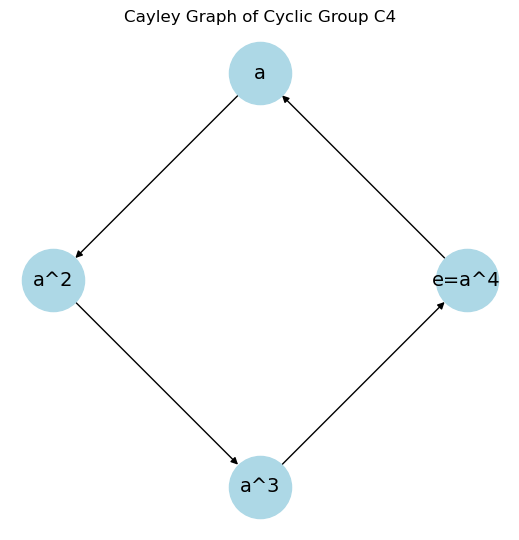

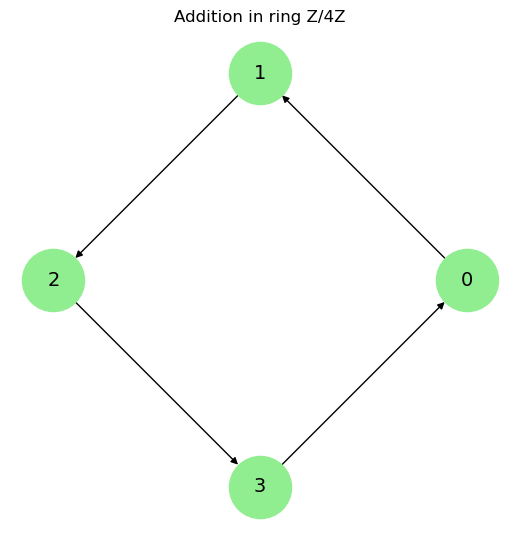

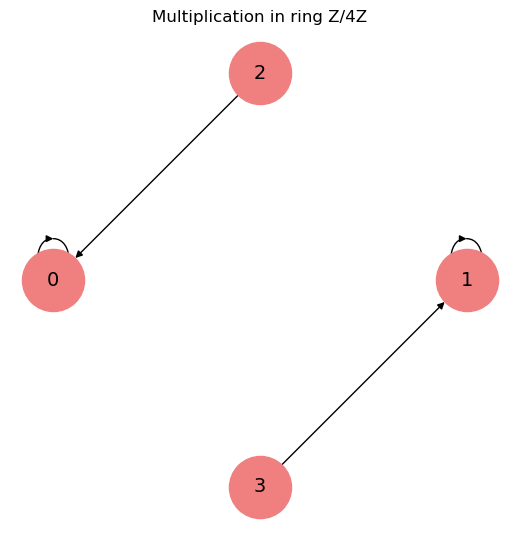

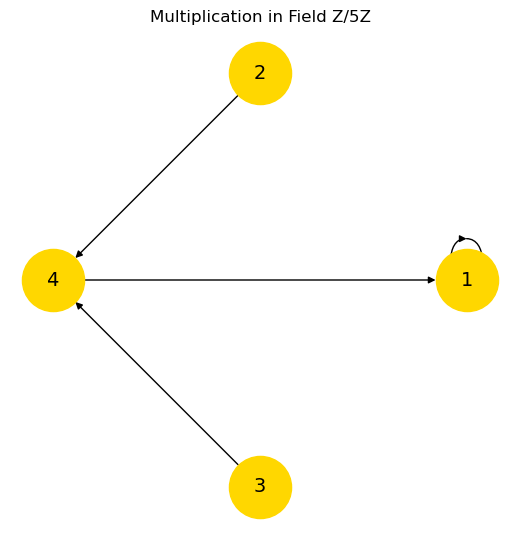

In [ ]:
# Fig-1: Group (visualize Cayley graph for C4 = {e, a, a^2, a^3}, where a^4 = e)
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # Define 
elements = ["e=a^4", "a", "a^2", "a^3"]
edges = [("e=a^4", "a"), ("a", "a^2"), ("a^2", "a^3"), ("a^3", "e=a^4")]
G.add_edges_from(edges)
pos = nx.circular_layout(G) # Position nodes in a circular layout

plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black", node_size=2000, font_size=14)
plt.title("Cayley Graph of Cyclic Group C4")
plt.s()

####################
# Fig-2: Ring Structure Z/4Z (visualize addition & multiplication separately)
G_add = nx.DiGraph()
elements = ["0", "1", "2", "3"]
edges_add = [("0", "1"), ("1", "2"), ("2", "3"), ("3", "0")]
G_add.add_edges_from(edges_add)

# Draw addition graph
plt.figure(figsize=(5, 5))
nx.draw(G_add, pos=nx.circular_layout(G_add), with_labels=True, node_color="lightgreen", edge_color="black", node_size=2000, font_size=14)
plt.title("Addition in ring Z/4Z")
plt.s()

# Define multiplication graph
G_mult = nx.DiGraph()
edges_mult = [("1", "1"), ("2", "0"), ("3", "1"), ("0", "0")]  # 2*2=0, 3*3=1, etc.
G_mult.add_edges_from(edges_mult)

# Draw multiplication graph
plt.figure(figsize=(5, 5))
nx.draw(G_mult, pos=nx.circular_layout(G_mult), with_labels=True, node_color="lightcoral", edge_color="black", node_size=2000, font_size=14)
plt.title("Multiplication in ring Z/4Z")
plt.s()

####################### Field: Z/5Z, fully connected multiplication graph
G_field = nx.DiGraph()
elements = ["0", "1", "2", "3", "4"]
edges_field = [("1", "1"), ("2", "4"), ("3", "4"), ("4", "1")]  # Multiplicative inverses
G_field.add_edges_from(edges_field)

# Draw the field structure
plt.figure(figsize=(5, 5))
nx.draw(G_field, pos=nx.circular_layout(G_field), with_labels=True, node_color="gold", edge_color="black", node_size=2000, font_size=14)
plt.title("Multiplication in Field Z/5Z")
plt.s()

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/abstract_algebra1.png" alt="abstract_algebra1" width="900">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/abstract_algebra2.png" alt="abstract_algebra2" width="500">